# **Data Preprocessing**

The goal of preprocessing is to clean, structure, and refine the dataset, ensuring it's suitable for deeper exploration and modeling. This step involves:

- Handling missing or inconsistent data to improve data quality.
- Normalizing, transforming, or scaling data for consistency.
- Addressing duplicate entries, irrelevant information, and outliers.
- Merging and restructuring columns for better organization.

Effective preprocessing ensures that the data is reliable and accurate, setting a strong foundation for subsequent analysis and model-building.

## Index<a id='toc0_'></a>
1. [Libraries](#toc1_)
2. [Datasets First Display](#toc2_)
3. [Treatment of Data](#toc3_)

### 1. <a id='toc1_'></a>[Libraries](#toc0_)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2. <a id='toc2_'></a>[Datasets First Display](#toc0_)

In [2]:
df1 = pd.read_csv('/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/NFL_data_analysis/data/NFL_team_stats_2003_2023.csv')
df2 = pd.read_csv('/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/NFL_data_analysis/data/NFL_league_stats.csv')

In [3]:
# To show all coumns and rows:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

First glimpse of dataframes' columns/variables and rows:

In [4]:
print('NFL_team_stats_2003_2023:', df1.shape)

NFL_team_stats_2003_2023: (672, 35)


In [5]:
df1.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties'],
      dtype='object')

In [6]:
df1.head(3)

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN


In [7]:
df1.tail(3)

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
669,2023,Los Angeles Rams,10,7,0.588,404,377,27,1.6,17,6108,1094,5.6,18,5,351,361,583,4063,26,13,6.6,206,477,2045,18,4.3,110,89,720,35,41.1,9.2,133.32,NaN
670,2023,Seattle Seahawks,9,8,0.529,364,402,-38,-2.2,17,5490,995,5.5,17,5,317,371,575,3910,23,12,6.4,189,382,1580,11,4.1,93,111,954,35,38.8,8.4,62.33,NaN
671,2023,Arizona Cardinals,4,13,0.235,330,455,-125,-7.4,17,5509,1068,5.2,18,6,330,355,555,3144,18,12,5.3,173,471,2365,17,5.0,127,101,859,30,35.0,9.4,-2.99,NaN


In [8]:
# check for updated NFL teams' names, as some have changed through time, and it will be important afterwards.
df1['team'].value_counts()

team
New England Patriots        21
Seattle Seahawks            21
Tampa Bay Buccaneers        21
New Orleans Saints          21
Carolina Panthers           21
Detroit Lions               21
Chicago Bears               21
Minnesota Vikings           21
Green Bay Packers           21
New York Giants             21
Miami Dolphins              21
Dallas Cowboys              21
Philadelphia Eagles         21
San Francisco 49ers         21
Arizona Cardinals           21
Denver Broncos              21
Kansas City Chiefs          21
Houston Texans              21
Jacksonville Jaguars        21
Tennessee Titans            21
Indianapolis Colts          21
Cleveland Browns            21
Pittsburgh Steelers         21
Cincinnati Bengals          21
Baltimore Ravens            21
New York Jets               21
Buffalo Bills               21
Atlanta Falcons             21
Washington Redskins         17
Oakland Raiders             17
San Diego Chargers          14
St. Louis Rams              13
Los

In [9]:
print('NFL_league_stats:', df2.shape)

NFL_league_stats: (702, 19)


In [10]:
df2.columns

Index(['Unnamed: 0', 'NFL Team', 'W', 'L', 'T', 'PCT', 'PF', 'PA', 'Net Pts',
       'Home', 'Road', 'Div', 'Pct', 'Conf', 'Pct.1', 'Non-Conf', 'Strk',
       'Last 5', 'Year'],
      dtype='object')

In [11]:
df2.head(3)

,Unnamed: 0,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
0,0,Los Angeles Chargers,1,15,0,0.063,269,440,-171,1 - 7 - 0,0 - 8 - 0,1 - 7 - 0,0.125,1 - 11 - 0,0.083,0 - 4 - 0,4L,1 - 4 - 0,2000
1,1,Arizona Cardinals,3,13,0,0.188,210,443,-233,3 - 5 - 0,0 - 8 - 0,2 - 6 - 0,0.250,2 - 10 - 0,0.167,1 - 3 - 0,7L,0 - 5 - 0,2000
2,2,Cleveland Browns,3,13,0,0.188,161,419,-258,2 - 6 - 0,1 - 7 - 0,2 - 8 - 0,0.200,3 - 10 - 0,0.231,0 - 3 - 0,5L,0 - 5 - 0,2000


In [12]:
df2.tail(3)

,Unnamed: 0,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
699,699,Tennessee Titans,12,5,0,0.706,419,354,65,7 - 2 - 0,5 - 3 - 0,5 - 1 - 0,0.833,8 - 4 - 0,0.667,4 - 1 - 0,3W,4 - 1 - 0,2021
700,700,Green Bay Packers,13,4,0,0.765,450,371,79,8 - 0 - 0,5 - 4 - 0,4 - 2 - 0,0.667,9 - 3 - 0,0.750,4 - 1 - 0,1L,4 - 1 - 0,2021
701,701,Tampa Bay Buccaneers,13,4,0,0.765,511,353,158,7 - 1 - 0,6 - 3 - 0,4 - 2 - 0,0.667,8 - 4 - 0,0.667,5 - 0 - 0,3W,4 - 1 - 0,2021


In [13]:
df2['NFL Team'].value_counts()

NFL Team
Los Angeles Chargers     22
Arizona Cardinals        22
Tennessee Titans         22
New York Giants          22
Las Vegas Raiders        22
Baltimore Ravens         22
Philadelphia Eagles      22
Minnesota Vikings        22
Miami Dolphins           22
Denver Broncos           22
Tampa Bay Buccaneers     22
New Orleans Saints       22
Los Angeles Rams         22
Indianapolis Colts       22
Pittsburgh Steelers      22
New York Jets            22
Green Bay Packers        22
Detroit Lions            22
Washington Commanders    22
Buffalo Bills            22
Kansas City Chiefs       22
Jacksonville Jaguars     22
Carolina Panthers        22
Seattle Seahawks         22
San Francisco 49ers      22
New England Patriots     22
Dallas Cowboys           22
Chicago Bears            22
Cincinnati Bengals       22
Atlanta Falcons          22
Cleveland Browns         22
Houston Texans           20
Name: count, dtype: int64

### 3. <a id='toc3_'></a>[Treatment of Data](#toc0_)

Given that df2 has data up to 2021 season, will scrape data for 2022 and 2023 seasons to append.

In [14]:
def scrape_nfl_standings(year):
    url = f'https://www.nfl.com/standings/league/{year}/REG'
    
    response = requests.get(url)
    response.raise_for_status()
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    table = soup.find('table')
    
    df = pd.read_html(str(table))[0]
    
    df['Year'] = year
    
    return df

df_2022 = scrape_nfl_standings(2022)
df_2023 = scrape_nfl_standings(2023)

new_data = pd.concat([df_2022, df_2023], ignore_index=True)

new_data.head()

,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
0,Chicago Bears Bears,3,14,0,0.176,326,463,-137,2 - 7 - 0,1 - 7 - 0,0 - 6 - 0,0.000,1 - 11 - 0,0.083,2 - 3 - 0,10L,0 - 5 - 0,2022
1,Houston Texans Texans,3,13,1,0.206,289,420,-131,0 - 7 - 1,3 - 6 - 0,3 - 2 - 1,0.583,3 - 8 - 1,0.292,0 - 5 - 0,1W,2 - 3 - 0,2022
2,Arizona Cardinals Cardinals,4,13,0,0.235,340,449,-109,1 - 8 - 0,3 - 5 - 0,1 - 5 - 0,0.167,3 - 9 - 0,0.250,1 - 4 - 0,7L,0 - 5 - 0,2022
3,Indianapolis Colts Colts,4,12,1,0.265,289,427,-138,2 - 6 - 0,2 - 6 - 1,1 - 4 - 1,0.250,4 - 7 - 1,0.375,0 - 5 - 0,7L,0 - 5 - 0,2022
4,Denver Broncos Broncos,5,12,0,0.294,287,359,-72,4 - 4 - 0,1 - 8 - 0,1 - 5 - 0,0.167,3 - 9 - 0,0.250,2 - 3 - 0,1W,2 - 3 - 0,2022


Apparently, there is an issue with the NFL teams' names. Will proceed to fix it.

In [15]:
new_data['NFL Team'].value_counts()

NFL Team
Chicago Bears  Bears                        2
New Orleans Saints  Saints                  2
Buffalo Bills  xz  Bills  xz                2
Miami Dolphins  x  Dolphins  x              2
Washington Commanders  Commanders           2
New England Patriots  Patriots              2
Tennessee Titans  Titans                    2
New York Jets  Jets                         2
Tampa Bay Buccaneers  xz  Buccaneers  xz    2
Atlanta Falcons  Falcons                    2
Las Vegas Raiders  Raiders                  2
Arizona Cardinals  Cardinals                2
Denver Broncos  Broncos                     2
Indianapolis Colts  Colts                   2
Carolina Panthers  Panthers                 2
Detroit Lions  xz  Lions  xz                1
Houston Texans  xz  Texans  xz              1
Minnesota Vikings  Vikings                  1
Cincinnati Bengals  Bengals                 1
Green Bay Packers  x  Packers  x            1
Jacksonville Jaguars  Jaguars               1
Seattle Seahawks  Seahawk

In [16]:
new_data['NFL Team'] = new_data['NFL Team'].apply(lambda x: x.split())
new_data['NFL Team'] = new_data['NFL Team'].apply(lambda x: ''.join(x[:2]) + ' ' + ' '.join(x[2:]))

new_data['NFL Team'].value_counts()

NFL Team
ChicagoBears Bears                      2
NewOrleans Saints Saints                2
BuffaloBills xz Bills xz                2
MiamiDolphins x Dolphins x              2
WashingtonCommanders Commanders         2
NewEngland Patriots Patriots            2
TennesseeTitans Titans                  2
NewYork Jets Jets                       2
TampaBay Buccaneers xz Buccaneers xz    2
AtlantaFalcons Falcons                  2
LasVegas Raiders Raiders                2
ArizonaCardinals Cardinals              2
DenverBroncos Broncos                   2
IndianapolisColts Colts                 2
CarolinaPanthers Panthers               2
DetroitLions xz Lions xz                1
HoustonTexans xz Texans xz              1
MinnesotaVikings Vikings                1
CincinnatiBengals Bengals               1
GreenBay Packers x Packers x            1
JacksonvilleJaguars Jaguars             1
SeattleSeahawks Seahawks                1
ClevelandBrowns x Browns x              1
LosAngeles Rams x Rams x 

In [17]:
new_data['NFL Team'] = new_data['NFL Team'].apply(lambda x: ' '.join(x.split()[:2]))

new_data['NFL Team'].value_counts()

NFL Team
ChicagoBears Bears                 2
NewYork Jets                       2
SanFrancisco 49ers                 2
BuffaloBills xz                    2
LosAngeles Chargers                2
NewYork Giants                     2
MiamiDolphins x                    2
WashingtonCommanders Commanders    2
NewEngland Patriots                2
GreenBay Packers                   2
TennesseeTitans Titans             2
TampaBay Buccaneers                2
NewOrleans Saints                  2
LasVegas Raiders                   2
ArizonaCardinals Cardinals         2
IndianapolisColts Colts            2
DenverBroncos Broncos              2
LosAngeles Rams                    2
KansasCity Chiefs                  2
AtlantaFalcons Falcons             2
CarolinaPanthers Panthers          2
PhiladelphiaEagles x               1
DallasCowboys xz                   1
DetroitLions xz                    1
PittsburghSteelers x               1
HoustonTexans xz                   1
SeattleSeahawks Seahawks     

In [18]:
team_name_map = {
    "NewEngland": "New England",
    "SanFrancisco": "San Francisco",
    "KansasCity": "Kansas City",
    "TampaBay": "Tampa Bay",
    "LosAngeles": "Los Angeles",
    "GreenBay": "Green Bay",
    "BuffaloBills": "Buffalo Bills",
    "ChicagoBears": "Chicago Bears",
    "HoustonTexans": "Houston Texans",
    "ArizonaCardinals": "Arizona Cardinals",
    "IndianapolisColts": "Indianapolis Colts",
    "DenverBroncos": "Denver Broncos",
    "LasVegas": "Las Vegas",
    "AtlantaFalcons": "Atlanta Falcons",
    "CarolinaPanthers": "Carolina Panthers",
    "ClevelandBrowns": "Cleveland Browns",
    "NewOrleans": "New Orleans",
    "NewYork": "New York",
    "TennesseeTitans": "Tennessee Titans",
    "WashingtonCommanders": "Washington Commanders",
    "DetroitLions": "Detroit Lions",
    "JacksonvilleJaguars": "Jacksonville Jaguars",
    "MiamiDolphins": "Miami Dolphins",
    "PittsburghSteelers": "Pittsburgh Steelers",
    "SeattleSeahawks": "Seattle Seahawks",
    "BaltimoreRavens": "Baltimore Ravens",
    "CincinnatiBengals": "Cincinnati Bengals",
    "DallasCowboys": "Dallas Cowboys",
    "MinnesotaVikings": "Minnesota Vikings",
    "PhiladelphiaEagles": "Philadelphia Eagles",
}

new_data['NFL Team'] = new_data['NFL Team'].apply(lambda x: team_name_map.get(x.split()[0], x.split()[0]) + ' ' + x.split()[1])

new_data['NFL Team'].value_counts()

NFL Team
Chicago Bears Bears                 2
New York Jets                       2
San Francisco 49ers                 2
Buffalo Bills xz                    2
Los Angeles Chargers                2
New York Giants                     2
Miami Dolphins x                    2
Washington Commanders Commanders    2
New England Patriots                2
Green Bay Packers                   2
Tennessee Titans Titans             2
Tampa Bay Buccaneers                2
New Orleans Saints                  2
Las Vegas Raiders                   2
Arizona Cardinals Cardinals         2
Indianapolis Colts Colts            2
Denver Broncos Broncos              2
Los Angeles Rams                    2
Kansas City Chiefs                  2
Atlanta Falcons Falcons             2
Carolina Panthers Panthers          2
Philadelphia Eagles x               1
Dallas Cowboys xz                   1
Detroit Lions xz                    1
Pittsburgh Steelers x               1
Houston Texans xz                   1
Sea

In [19]:
def clean_suffix(name):
    suffixes = [' xz*', ' xz', ' x']
    for suffix in suffixes:
        if name.endswith(suffix):
            name = name[:-len(suffix)].strip()
    return name

new_data['NFL Team'] = new_data['NFL Team'].apply(clean_suffix)

new_data['NFL Team'].values

array(['Chicago Bears Bears', 'Houston Texans Texans',
       'Arizona Cardinals Cardinals', 'Indianapolis Colts Colts',
       'Denver Broncos Broncos', 'Los Angeles Rams', 'Las Vegas Raiders',
       'Atlanta Falcons Falcons', 'Carolina Panthers Panthers',
       'Cleveland Browns Browns', 'New Orleans Saints', 'New York Jets',
       'Tennessee Titans Titans', 'Green Bay Packers',
       'New England Patriots', 'Tampa Bay Buccaneers',
       'Washington Commanders Commanders', 'Detroit Lions Lions',
       'Jacksonville Jaguars', 'Miami Dolphins', 'New York Giants',
       'Pittsburgh Steelers Steelers', 'Seattle Seahawks',
       'Baltimore Ravens', 'Los Angeles Chargers', 'Cincinnati Bengals',
       'Dallas Cowboys', 'Buffalo Bills', 'Minnesota Vikings',
       'San Francisco 49ers', 'Kansas City Chiefs', 'Philadelphia Eagles',
       'Carolina Panthers Panthers', 'Arizona Cardinals Cardinals',
       'New England Patriots', 'Washington Commanders Commanders',
       'Los Angeles

In [20]:
team_name_map = {
    'Chicago Bears Bears': 'Chicago Bears',
    'Houston Texans Texans': 'Houston Texans',
    'Arizona Cardinals Cardinals': 'Arizona Cardinals',
    'Indianapolis Colts Colts': 'Indianapolis Colts',
    'Denver Broncos Broncos': 'Denver Broncos',
    'Atlanta Falcons Falcons': 'Atlanta Falcons',
    'Carolina Panthers Panthers': 'Carolina Panthers',
    'Cleveland Browns Browns': 'Cleveland Browns',
    'Tennessee Titans Titans': 'Tennessee Titans',
    'Washington Commanders Commanders': 'Washington Commanders',
    'Detroit Lions Lions': 'Detroit Lions',
    'Pittsburgh Steelers Steelers': 'Pittsburgh Steelers',
    'Seattle Seahawks Seahawks': 'Seattle Seahawks',
    'Jacksonville Jaguars Jaguars': 'Jacksonville Jaguars',
    'Cincinnati Bengals Bengals': 'Cincinnati Bengals',
    'Minnesota Vikings Vikings': 'Minnesota Vikings'
}

new_data['NFL Team'] = new_data['NFL Team'].map(team_name_map).fillna(new_data['NFL Team'])

new_data['NFL Team'].unique()

array(['Chicago Bears', 'Houston Texans', 'Arizona Cardinals',
       'Indianapolis Colts', 'Denver Broncos', 'Los Angeles Rams',
       'Las Vegas Raiders', 'Atlanta Falcons', 'Carolina Panthers',
       'Cleveland Browns', 'New Orleans Saints', 'New York Jets',
       'Tennessee Titans', 'Green Bay Packers', 'New England Patriots',
       'Tampa Bay Buccaneers', 'Washington Commanders', 'Detroit Lions',
       'Jacksonville Jaguars', 'Miami Dolphins', 'New York Giants',
       'Pittsburgh Steelers', 'Seattle Seahawks', 'Baltimore Ravens',
       'Los Angeles Chargers', 'Cincinnati Bengals', 'Dallas Cowboys',
       'Buffalo Bills', 'Minnesota Vikings', 'San Francisco 49ers',
       'Kansas City Chiefs', 'Philadelphia Eagles'], dtype=object)

In [21]:
new_data.head(10)

,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
0,Chicago Bears,3,14,0,0.176,326,463,-137,2 - 7 - 0,1 - 7 - 0,0 - 6 - 0,0.000,1 - 11 - 0,0.083,2 - 3 - 0,10L,0 - 5 - 0,2022
1,Houston Texans,3,13,1,0.206,289,420,-131,0 - 7 - 1,3 - 6 - 0,3 - 2 - 1,0.583,3 - 8 - 1,0.292,0 - 5 - 0,1W,2 - 3 - 0,2022
2,Arizona Cardinals,4,13,0,0.235,340,449,-109,1 - 8 - 0,3 - 5 - 0,1 - 5 - 0,0.167,3 - 9 - 0,0.250,1 - 4 - 0,7L,0 - 5 - 0,2022
3,Indianapolis Colts,4,12,1,0.265,289,427,-138,2 - 6 - 0,2 - 6 - 1,1 - 4 - 1,0.250,4 - 7 - 1,0.375,0 - 5 - 0,7L,0 - 5 - 0,2022
4,Denver Broncos,5,12,0,0.294,287,359,-72,4 - 4 - 0,1 - 8 - 0,1 - 5 - 0,0.167,3 - 9 - 0,0.250,2 - 3 - 0,1W,2 - 3 - 0,2022
5,Los Angeles Rams,5,12,0,0.294,307,384,-77,4 - 5 - 0,1 - 7 - 0,1 - 5 - 0,0.167,3 - 9 - 0,0.250,2 - 3 - 0,2L,2 - 3 - 0,2022
6,Las Vegas Raiders,6,11,0,0.353,395,418,-23,4 - 4 - 0,2 - 7 - 0,3 - 3 - 0,0.500,5 - 7 - 0,0.417,1 - 4 - 0,3L,1 - 4 - 0,2022
7,Atlanta Falcons,7,10,0,0.412,365,386,-21,6 - 3 - 0,1 - 7 - 0,2 - 4 - 0,0.333,6 - 6 - 0,0.500,1 - 4 - 0,2W,2 - 3 - 0,2022
8,Carolina Panthers,7,10,0,0.412,347,374,-27,5 - 4 - 0,2 - 6 - 0,4 - 2 - 0,0.667,6 - 6 - 0,0.500,1 - 4 - 0,1W,3 - 2 - 0,2022
9,Cleveland Browns,7,10,0,0.412,361,381,-20,4 - 4 - 0,3 - 6 - 0,3 - 3 - 0,0.500,4 - 8 - 0,0.333,3 - 2 - 0,1L,2 - 3 - 0,2022


In [22]:
df2['NFL Team'].unique()

array(['Los Angeles Chargers', 'Arizona Cardinals', 'Cleveland Browns',
       'Atlanta Falcons', 'Cincinnati Bengals', 'Chicago Bears',
       'Dallas Cowboys', 'New England Patriots', 'San Francisco 49ers',
       'Seattle Seahawks', 'Carolina Panthers', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Buffalo Bills', 'Washington Commanders',
       'Detroit Lions', 'Green Bay Packers', 'New York Jets',
       'Pittsburgh Steelers', 'Indianapolis Colts', 'Los Angeles Rams',
       'New Orleans Saints', 'Tampa Bay Buccaneers', 'Denver Broncos',
       'Miami Dolphins', 'Minnesota Vikings', 'Philadelphia Eagles',
       'Baltimore Ravens', 'Las Vegas Raiders', 'New York Giants',
       'Tennessee Titans', 'Houston Texans'], dtype=object)

In [23]:
df2 = pd.concat([df2, new_data], ignore_index=True)

df2.tail()

,Unnamed: 0,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
761,NaN,Philadelphia Eagles,11,6,0,0.647,433,428,5,6 - 2 - 0,5 - 4 - 0,4 - 2 - 0,0.667,7 - 5 - 0,0.583,4 - 1 - 0,2L,1 - 4 - 0,2023
762,NaN,Dallas Cowboys,12,5,0,0.706,509,315,194,8 - 0 - 0,4 - 5 - 0,5 - 1 - 0,0.833,9 - 3 - 0,0.750,3 - 2 - 0,2W,3 - 2 - 0,2023
763,NaN,Detroit Lions,12,5,0,0.706,461,395,66,6 - 2 - 0,6 - 3 - 0,4 - 2 - 0,0.667,8 - 4 - 0,0.667,4 - 1 - 0,1W,3 - 2 - 0,2023
764,NaN,San Francisco 49ers,12,5,0,0.706,491,298,193,5 - 3 - 0,7 - 2 - 0,5 - 1 - 0,0.833,10 - 2 - 0,0.833,2 - 3 - 0,1L,3 - 2 - 0,2023
765,NaN,Baltimore Ravens,13,4,0,0.765,483,280,203,6 - 3 - 0,7 - 1 - 0,3 - 3 - 0,0.500,8 - 4 - 0,0.667,5 - 0 - 0,1L,4 - 1 - 0,2023


Now that df2 has updated data, will proceed to merge both DataFrames, based on the team and year columns.

In [24]:
df2.rename(columns={'NFL Team': 'team', 'Year': 'year', 'Pct': 'Division Pct', 'Pct.1': 'Conference Pct'}, inplace=True)

columns_to_merge = ['team', 'year', 'Home', 'Road', 'Div', 'Division Pct', 'Conf','Conference Pct', 'Non-Conf', 'Strk', 'Last 5']

NFL_teams_stats_df = pd.merge(df1, df2[columns_to_merge], on=['team', 'year'], how='left')

NFL_teams_stats_df.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,Home,Road,Div,Division Pct,Conf,Conference Pct,Non-Conf,Strk,Last 5
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN,8 - 0 - 0,6 - 2 - 0,5 - 1 - 0,0.833,11 - 1 - 0,0.917,3 - 1 - 0,12W,5 - 0 - 0
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN,4 - 4 - 0,6 - 2 - 0,4 - 2 - 0,0.667,7 - 5 - 0,0.583,3 - 1 - 0,2W,3 - 2 - 0
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN,4 - 4 - 0,2 - 6 - 0,2 - 4 - 0,0.333,4 - 8 - 0,0.333,2 - 2 - 0,3L,2 - 3 - 0
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN,4 - 4 - 0,2 - 6 - 0,1 - 5 - 0,0.167,6 - 6 - 0,0.500,0 - 4 - 0,2L,2 - 3 - 0
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN,7 - 1 - 0,3 - 5 - 0,4 - 2 - 0,0.667,7 - 5 - 0,0.583,3 - 1 - 0,2W,4 - 1 - 0


In [25]:
# once again, checking which names to update
NFL_teams_stats_df['team'].value_counts()

team
New England Patriots        21
Seattle Seahawks            21
Tampa Bay Buccaneers        21
New Orleans Saints          21
Carolina Panthers           21
Detroit Lions               21
Chicago Bears               21
Minnesota Vikings           21
Green Bay Packers           21
New York Giants             21
Miami Dolphins              21
Dallas Cowboys              21
Philadelphia Eagles         21
San Francisco 49ers         21
Arizona Cardinals           21
Denver Broncos              21
Kansas City Chiefs          21
Houston Texans              21
Jacksonville Jaguars        21
Tennessee Titans            21
Indianapolis Colts          21
Cleveland Browns            21
Pittsburgh Steelers         21
Cincinnati Bengals          21
Baltimore Ravens            21
New York Jets               21
Buffalo Bills               21
Atlanta Falcons             21
Washington Redskins         17
Oakland Raiders             17
San Diego Chargers          14
St. Louis Rams              13
Los

In [26]:
team_mapping = {
    'Washington Redskins': 'Washington Commanders',
    'Washington Football Team': 'Washington Commanders',
    'Washington Commanders': 'Washington Commanders',
    'Oakland Raiders': 'Las Vegas Raiders',
    'Las Vegas Raiders': 'Las Vegas Raiders',
    'San Diego Chargers': 'Los Angeles Chargers',
    'Los Angeles Chargers': 'Los Angeles Chargers',
    'St. Louis Rams': 'Los Angeles Rams',
    'Los Angeles Rams': 'Los Angeles Rams'
}

NFL_teams_stats_df['team'] = NFL_teams_stats_df['team'].replace(team_mapping)

NFL_teams_stats_df['team'].value_counts()

team
New England Patriots     21
Miami Dolphins           21
San Francisco 49ers      21
Seattle Seahawks         21
Los Angeles Rams         21
Atlanta Falcons          21
Tampa Bay Buccaneers     21
New Orleans Saints       21
Carolina Panthers        21
Detroit Lions            21
Chicago Bears            21
Minnesota Vikings        21
Green Bay Packers        21
New York Giants          21
Washington Commanders    21
Dallas Cowboys           21
Philadelphia Eagles      21
Los Angeles Chargers     21
Las Vegas Raiders        21
Denver Broncos           21
Kansas City Chiefs       21
Houston Texans           21
Jacksonville Jaguars     21
Tennessee Titans         21
Indianapolis Colts       21
Cleveland Browns         21
Pittsburgh Steelers      21
Cincinnati Bengals       21
Baltimore Ravens         21
New York Jets            21
Buffalo Bills            21
Arizona Cardinals        21
Name: count, dtype: int64

In [27]:
NFL_teams_stats_df.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,Home,Road,Div,Division Pct,Conf,Conference Pct,Non-Conf,Strk,Last 5
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN,8 - 0 - 0,6 - 2 - 0,5 - 1 - 0,0.833,11 - 1 - 0,0.917,3 - 1 - 0,12W,5 - 0 - 0
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN,4 - 4 - 0,6 - 2 - 0,4 - 2 - 0,0.667,7 - 5 - 0,0.583,3 - 1 - 0,2W,3 - 2 - 0
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN,4 - 4 - 0,2 - 6 - 0,2 - 4 - 0,0.333,4 - 8 - 0,0.333,2 - 2 - 0,3L,2 - 3 - 0
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN,4 - 4 - 0,2 - 6 - 0,1 - 5 - 0,0.167,6 - 6 - 0,0.500,0 - 4 - 0,2L,2 - 3 - 0
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN,7 - 1 - 0,3 - 5 - 0,4 - 2 - 0,0.667,7 - 5 - 0,0.583,3 - 1 - 0,2W,4 - 1 - 0


In [28]:
# copy to keep the original dataset
NFL_teams_stats_df_cleaned = NFL_teams_stats_df.copy()

Time to treat null values.

In [29]:
NFL_teams_stats_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   352 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

In [30]:
mov_present = NFL_teams_stats_df_cleaned.dropna(subset=['mov'])
mov_missing = NFL_teams_stats_df_cleaned[NFL_teams_stats_df_cleaned['mov'].isnull()]

features = ['wins', 'losses', 'points', 'points_opp', 'points_diff']
X_train = mov_present[features]
y_train = mov_present['mov']

model = LinearRegression()
model.fit(X_train, y_train)

X_missing = mov_missing[features]
NFL_teams_stats_df_cleaned.loc[NFL_teams_stats_df_cleaned['mov'].isnull(), 'mov'] = model.predict(X_missing)

NFL_teams_stats_df_cleaned['mov'].isnull().sum()

0

In [31]:
NFL_teams_stats_df_cleaned['ties'].value_counts()

ties
0.0    294
1.0     26
Name: count, dtype: int64

In [32]:
NFL_teams_stats_df_cleaned['ties'] = NFL_teams_stats_df_cleaned['ties'].fillna(0.0)
NFL_teams_stats_df_cleaned['ties'] = NFL_teams_stats_df_cleaned['ties'].astype(float)

In [33]:
NFL_teams_stats_df_cleaned['ties'].value_counts()

ties
0.0    646
1.0     26
Name: count, dtype: int64

In [34]:
def win_loss_to_ratio(record):
    if pd.isna(record):
        return None
    wins, losses, ties = map(int, record.split('-'))
    total_games = wins + losses + ties
    return (wins + 0.5 * ties) / total_games if total_games > 0 else 0

NFL_teams_stats_df_cleaned['Home'] = NFL_teams_stats_df_cleaned['Home'].apply(win_loss_to_ratio)
NFL_teams_stats_df_cleaned['Road'] = NFL_teams_stats_df_cleaned['Road'].apply(win_loss_to_ratio)
NFL_teams_stats_df_cleaned['Div'] = NFL_teams_stats_df_cleaned['Div'].apply(win_loss_to_ratio)
NFL_teams_stats_df_cleaned['Conf'] = NFL_teams_stats_df_cleaned['Conf'].apply(win_loss_to_ratio)
NFL_teams_stats_df_cleaned['Non-Conf'] = NFL_teams_stats_df_cleaned['Non-Conf'].apply(win_loss_to_ratio)
NFL_teams_stats_df_cleaned['Last 5'] = NFL_teams_stats_df_cleaned['Last 5'].apply(win_loss_to_ratio)

NFL_teams_stats_df_cleaned.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,Home,Road,Div,Division Pct,Conf,Conference Pct,Non-Conf,Strk,Last 5
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,0.0,1.000,0.750,0.833333,0.833,0.916667,0.917,0.75,12W,1.0
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,0.0,0.500,0.750,0.666667,0.667,0.583333,0.583,0.75,2W,0.6
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,0.0,0.500,0.250,0.333333,0.333,0.333333,0.333,0.50,3L,0.4
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,0.0,0.500,0.250,0.166667,0.167,0.500000,0.500,0.00,2L,0.4
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,0.0,0.875,0.375,0.666667,0.667,0.583333,0.583,0.75,2W,0.8


In [35]:
NFL_teams_stats_df_cleaned = NFL_teams_stats_df_cleaned.drop(columns=['Division Pct', 'Conference Pct'])
NFL_teams_stats_df_cleaned.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties', 'Home', 'Road',
       'Div', 'Conf', 'Non-Conf', 'Strk', 'Last 5'],
      dtype='object')

In [36]:
NFL_teams_stats_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   672 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

In [37]:
def fill_missing_win_loss_ratio(row):
    wins = row['wins']
    losses = row['losses']
    total_games = wins + losses
    win_loss_ratio = wins / total_games if total_games > 0 else 0
    
    if pd.isnull(row['Home']):
        row['Home'] = win_loss_ratio
    if pd.isnull(row['Road']):
        row['Road'] = win_loss_ratio
    if pd.isnull(row['Div']):
        row['Div'] = win_loss_ratio
    if pd.isnull(row['Conf']):
        row['Conf'] = win_loss_ratio
    if pd.isnull(row['Non-Conf']):
        row['Non-Conf'] = win_loss_ratio
    if pd.isnull(row['Last 5']):
        row['Last 5'] = win_loss_ratio

    return row

NFL_teams_stats_df_cleaned = NFL_teams_stats_df_cleaned.apply(fill_missing_win_loss_ratio, axis=1)

In [38]:
NFL_teams_stats_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   672 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

In [39]:
NFL_teams_stats_df_cleaned.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,Home,Road,Div,Conf,Non-Conf,Strk,Last 5
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,0.0,1.000,0.750,0.833333,0.916667,0.75,12W,1.0
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,0.0,0.500,0.750,0.666667,0.583333,0.75,2W,0.6
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,0.0,0.500,0.250,0.333333,0.333333,0.50,3L,0.4
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,0.0,0.500,0.250,0.166667,0.500000,0.00,2L,0.4
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,0.0,0.875,0.375,0.666667,0.583333,0.75,2W,0.8


In [40]:
def strk_to_numeric(strk):
    if pd.isnull(strk):
        return None
    if isinstance(strk, str):
        try:
            if strk.endswith('W'):
                return int(strk[:-1])
            elif strk.endswith('L'):
                return -int(strk[:-1])
            else:
                return None
        except ValueError:
            return None
    else:
        return None 
    
NFL_teams_stats_df_cleaned['Strk'] = NFL_teams_stats_df_cleaned['Strk'].apply(strk_to_numeric)

NFL_teams_stats_df_cleaned.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,Home,Road,Div,Conf,Non-Conf,Strk,Last 5
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,0.0,1.000,0.750,0.833333,0.916667,0.75,12.0,1.0
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,0.0,0.500,0.750,0.666667,0.583333,0.75,2.0,0.6
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,0.0,0.500,0.250,0.333333,0.333333,0.50,-3.0,0.4
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,0.0,0.500,0.250,0.166667,0.500000,0.00,-2.0,0.4
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,0.0,0.875,0.375,0.666667,0.583333,0.75,2.0,0.8


In [41]:
NFL_teams_stats_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   672 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

In [42]:
NFL_teams_stats_df_cleaned['Strk'].value_counts()

Strk
 1.0     146
-1.0     139
 2.0      75
-2.0      60
-3.0      39
 4.0      31
 3.0      31
-4.0      23
 5.0       9
-6.0       8
 6.0       7
-5.0       7
-7.0       6
 8.0       4
-8.0       4
 7.0       3
-10.0      3
 10.0      2
 12.0      2
-16.0      2
-9.0       2
 9.0       1
 11.0      1
-14.0      1
 16.0      1
 14.0      1
-15.0      1
Name: count, dtype: int64

In [43]:
mode_strk = NFL_teams_stats_df_cleaned['Strk'].mode().iloc[0]
NFL_teams_stats_df_cleaned['Strk'] = NFL_teams_stats_df_cleaned['Strk'].fillna(mode_strk)

NFL_teams_stats_df_cleaned['Strk'].isnull().sum()

0

In [44]:
integer_columns = ['year', 'wins', 'losses', 'points', 'points_opp', 'ties', 'g', 'turnovers', 'fumbles_lost', 'first_down', 'pass_cmp', 'pass_att', 'pass_td', 'pass_int', 'rush_att', 'rush_td', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd']
NFL_teams_stats_df_cleaned[integer_columns] = NFL_teams_stats_df_cleaned[integer_columns].astype(int)

NFL_teams_stats_df_cleaned.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,Home,Road,Div,Conf,Non-Conf,Strk,Last 5
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,0,1.000,0.750,0.833333,0.916667,0.75,12.0,1.0
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,0,0.500,0.750,0.666667,0.583333,0.75,2.0,0.6
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,0,0.500,0.250,0.333333,0.333333,0.50,-3.0,0.4
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,0,0.500,0.250,0.166667,0.500000,0.00,-2.0,0.4
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,0,0.875,0.375,0.666667,0.583333,0.75,2.0,0.8


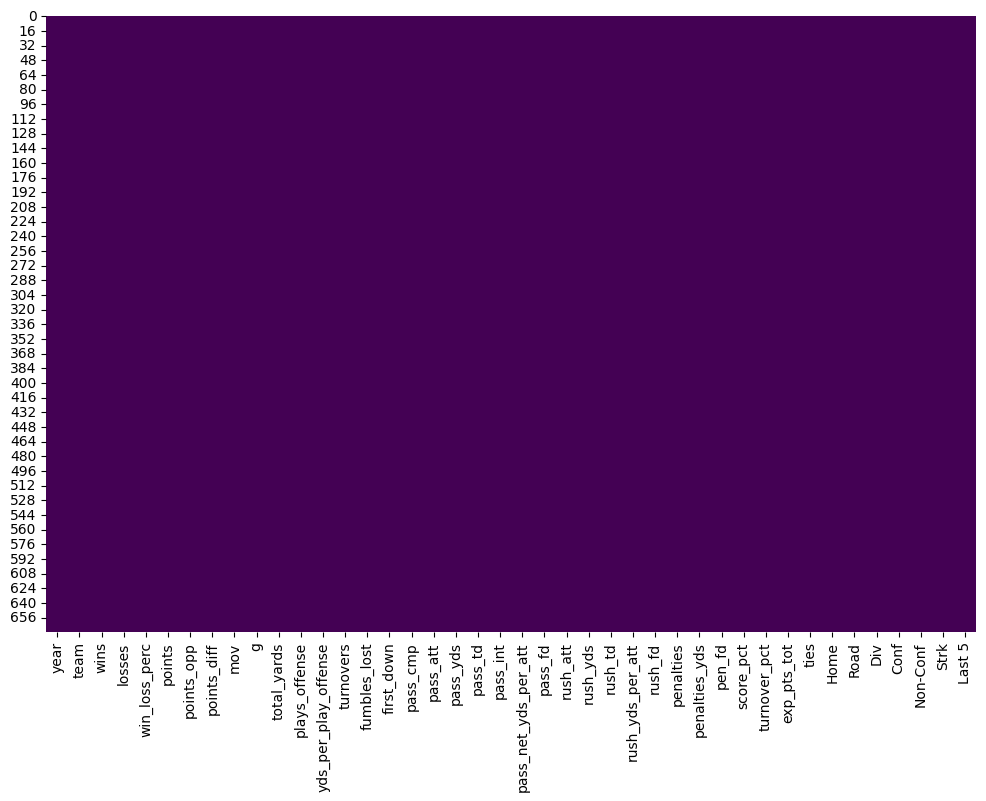

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(NFL_teams_stats_df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.show()

Add Super Bowl winners data, available at public domain, for future analysis:

In [46]:
super_bowl_winners = [
    (2003, 'New England Patriots'),
    (2004, 'New England Patriots'),
    (2005, 'Pittsburgh Steelers'),
    (2006, 'Indianapolis Colts'),
    (2007, 'New York Giants'),
    (2008, 'Pittsburgh Steelers'),
    (2009, 'New Orleans Saints'),
    (2010, 'Green Bay Packers'),
    (2011, 'New York Giants'),
    (2012, 'Baltimore Ravens'),
    (2013, 'Seattle Seahawks'),
    (2014, 'New England Patriots'),
    (2015, 'Denver Broncos'),
    (2016, 'New England Patriots'),
    (2017, 'Philadelphia Eagles'),
    (2018, 'New England Patriots'),
    (2019, 'Kansas City Chiefs'),
    (2020, 'Tampa Bay Buccaneers'),
    (2021, 'Los Angeles Rams'),
    (2022, 'Kansas City Chiefs'),
    (2023, 'Kansas City Chiefs')
]

super_bowl_df = pd.DataFrame(super_bowl_winners, columns=['year', 'team'])

NFL_stats_df_cleaned = pd.merge(NFL_teams_stats_df_cleaned, super_bowl_df, on=['year', 'team'], how='left', indicator=True)

NFL_stats_df_cleaned['super_bowl_win'] = (NFL_stats_df_cleaned['_merge'] == 'both').astype(int)

NFL_stats_df_cleaned.drop(columns=['_merge'], inplace=True)

NFL_stats_df_cleaned.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,Home,Road,Div,Conf,Non-Conf,Strk,Last 5,super_bowl_win
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,0,1.000,0.750,0.833333,0.916667,0.75,12.0,1.0,1
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,0,0.500,0.750,0.666667,0.583333,0.75,2.0,0.6,0
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,0,0.500,0.250,0.333333,0.333333,0.50,-3.0,0.4,0
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,0,0.500,0.250,0.166667,0.500000,0.00,-2.0,0.4,0
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,0,0.875,0.375,0.666667,0.583333,0.75,2.0,0.8,0


In [47]:
NFL_stats_df_cleaned.rename(columns={'team': 'Team', 'year': 'Year', 'wins': 'Wins', 'losses': 'Losses',
                                     'win_loss_perc': 'Win-Loss Percentage', 'points': 'Points',
                                     'points_opp': 'Points Allowed', 'points_diff': 'Points Differential',
                                     'mov': 'Margin of Victory', 'g': 'Games', 'total_yards': 'Total Yards',
                                     'plays_offense': 'Offensive Plays', 'yds_per_play_offense': 'Total Yards per Play',
                                     'turnovers': 'Turnovers', 'fumbles_lost': 'Fumbles Lost', 'first_down': 'First Downs',
                                     'pass_cmp': 'Pass Completions', 'pass_att': 'Pass Attempts', 'pass_yds': 'Passing Yards',
                                     'pass_td': 'Passing TD', 'pass_int': 'Interceptions',
                                     'pass_net_yds_per_att': 'Passing Yards per Attempt', 'pass_fd': 'Passing First Downs',
                                     'rush_att': 'Rush Attempts', 'rush_yds': 'Rushing Yards', 'rush_td': 'Rushing TD',
                                     'rush_yds_per_att': 'Rushing Yards per Attempt', 'rush_fd': 'Rushing First Downs',
                                     'penalties': 'Penalties', 'penalties_yds': 'Penalty Yards', 'pen_fd': 'Penalty First Downs Given',
                                     'score_pct': 'Scoring Percentage', 'turnover_pct': 'Turnover Percentage',
                                     'exp_pts_tot': 'Expected Points Total', 'ties': 'Ties', 'Div': 'Division',
                                     'Conf': 'Conference', 'Non-Conf': 'Non-Conference', 'Strk': 'Streak',
                                     'super_bowl_win': 'SuperBowl Win'}, inplace=True)

NFL_stats_df_cleaned.head(3)

,Year,Team,Wins,Losses,Win-Loss Percentage,Points,Points Allowed,Points Differential,Margin of Victory,Games,Total Yards,Offensive Plays,Total Yards per Play,Turnovers,Fumbles Lost,First Downs,Pass Completions,Pass Attempts,Passing Yards,Passing TD,Interceptions,Passing Yards per Attempt,Passing First Downs,Rush Attempts,Rushing Yards,Rushing TD,Rushing Yards per Attempt,Rushing First Downs,Penalties,Penalty Yards,Penalty First Downs Given,Scoring Percentage,Turnover Percentage,Expected Points Total,Ties,Home,Road,Division,Conference,Non-Conference,Streak,Last 5,SuperBowl Win
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,0,1.0,0.75,0.833333,0.916667,0.75,12.0,1.0,1
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,0,0.5,0.75,0.666667,0.583333,0.75,2.0,0.6,0
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,0,0.5,0.25,0.333333,0.333333,0.50,-3.0,0.4,0


Save DataFrame for Streamlit app.

In [48]:
NFL_stats_df_cleaned.to_csv('/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/NFL_data_analysis/clean_data/NFL_stats_df_cleaned.csv.gz')